### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
Faturamento_lojas ={
    "loja_1":loja["Preço"].sum(),
    "loja_2":loja2["Preço"].sum(),
    "loja_3":loja3["Preço"].sum(),
    "loja_4":loja4["Preço"].sum(),
}

for nome_loja, faturamento_loja in Faturamento_lojas.items():
  print(f"O faturamento da loja {nome_loja} foi de R${faturamento_loja:,.2f}")

O faturamento da loja loja_1 foi de R$1,534,509.12
O faturamento da loja loja_2 foi de R$1,488,459.06
O faturamento da loja loja_3 foi de R$1,464,025.03
O faturamento da loja loja_4 foi de R$1,384,497.58


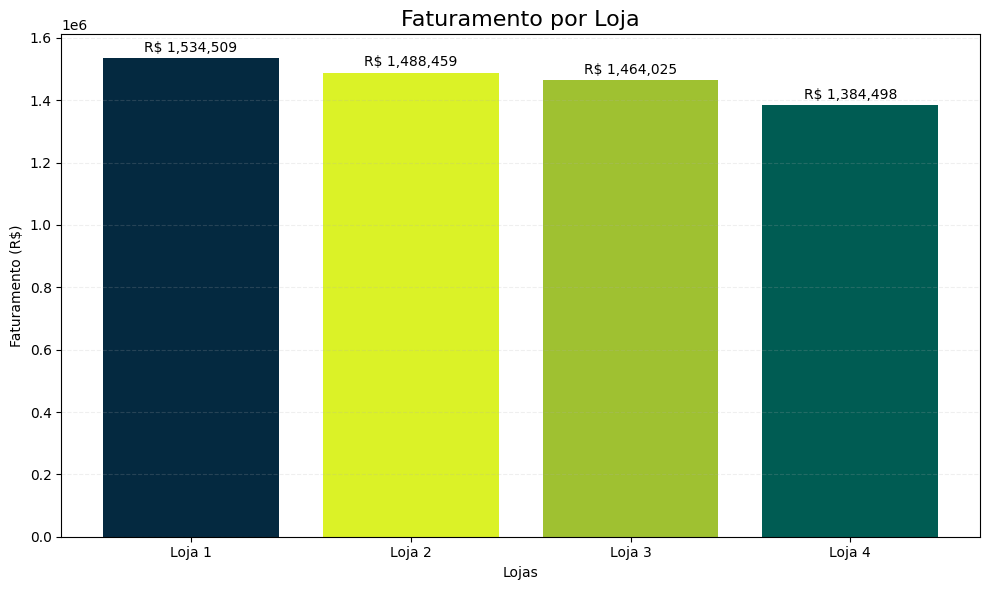

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
total_geral = sum(faturamento)
cores = ['#042940', '#DBF227', '#9FC131', '#005C53']


plt.figure(figsize=(10,6))
plt.bar(lojas, faturamento)
cores = ['#042940', '#DBF227', '#9FC131', '#005C53']
plt.bar(lojas, faturamento, color=cores)

plt.title("Faturamento por Loja", fontsize=16)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.2)


for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



# 2. Vendas por Categoria


In [ ]:
print("Loja 1 - Produtos por Categoria")
print(loja["Categoria do Produto"].value_counts())
print("\n")

print("Loja 2 - Produtos por Categoria")
print(loja2["Categoria do Produto"].value_counts())
print("\n")

print("Loja 3 - Produtos por Categoria")
print(loja3["Categoria do Produto"].value_counts())
print("\n")

print("Loja 4 - Produtos por Categoria")
print(loja4["Categoria do Produto"].value_counts())
print("\n")


Loja 1 - Produtos por Categoria
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


Loja 2 - Produtos por Categoria
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


Loja 3 - Produtos por Categoria
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


Loja 4 - Produtos por Categoria
Categoria do Produto
moveis  

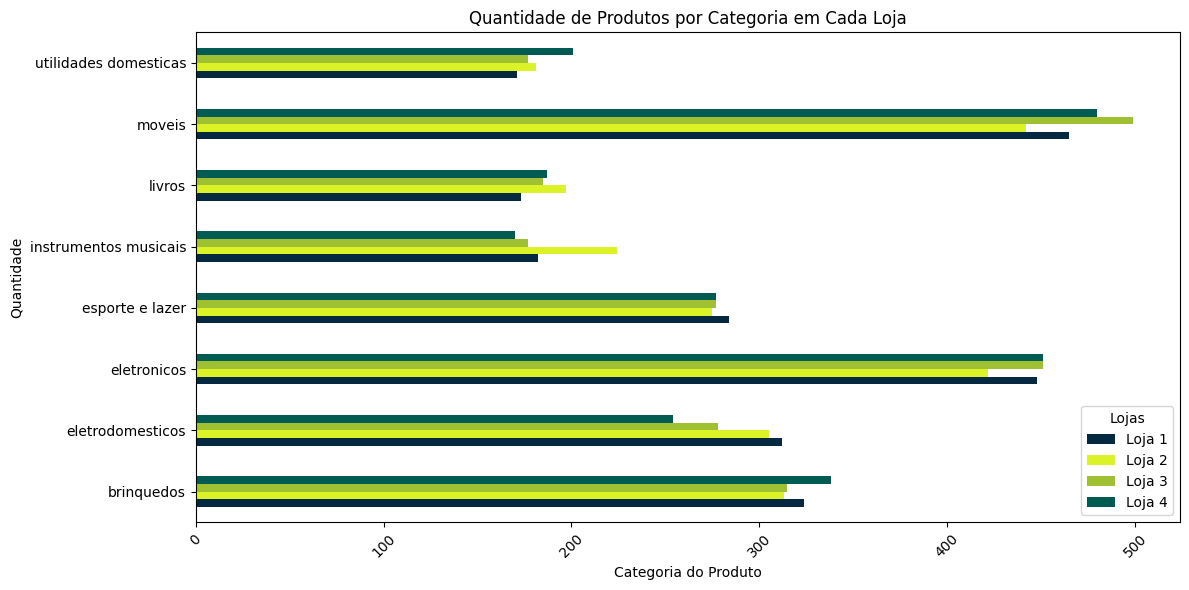

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for df in [loja, loja2, loja3, loja4]:
    df.columns = df.columns.str.strip()

categoria_loja1 = loja ["Categoria do Produto"].value_counts()
categoria_loja2 = loja2["Categoria do Produto"].value_counts()
categoria_loja3 = loja3["Categoria do Produto"].value_counts()
categoria_loja4 = loja4["Categoria do Produto"].value_counts()


df_categorias = pd.DataFrame({
    "Loja 1": categoria_loja1,
    "Loja 2": categoria_loja2,
    "Loja 3": categoria_loja3,
    "Loja 4": categoria_loja4
}).fillna(0)

cores = ['#042940', '#DBF227', '#9FC131', '#005C53']

df_categorias.plot(kind="barh", figsize=(12, 6), color=cores)
plt.title("Quantidade de Produtos por Categoria em Cada Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()


print("Média de Avaliação da Compra:")
print(f"Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação da Compra:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


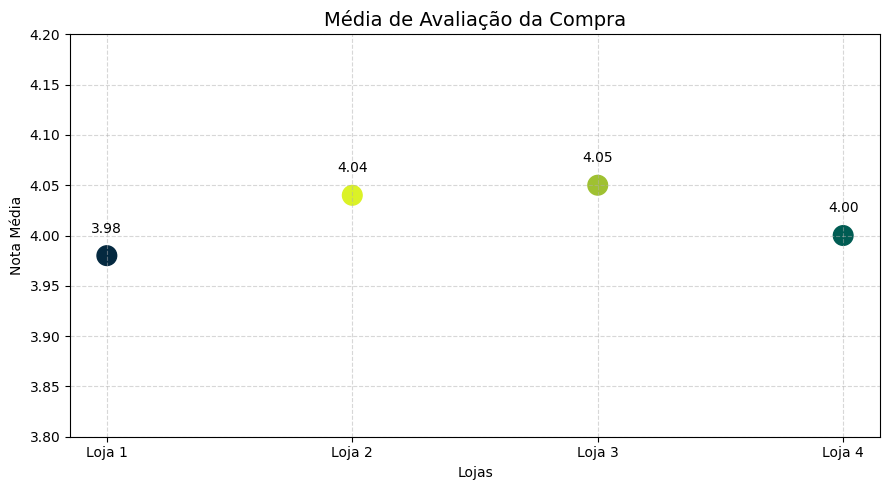

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
cores = ['#042940', '#DBF227', '#9FC131', '#005C53']

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(9,5))

# Plotando os pontos
plt.scatter(x, avaliacoes, color=cores, s=200)

# Adicionando os valores acima dos pontos
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.02, f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.title("Média de Avaliação da Compra", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Nota Média")
plt.xticks(x, lojas)  # Define os nomes das lojas no eixo X
plt.ylim(3.8, 4.2)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produto_destaque(loja_df, nome_loja):
    contagem = loja_df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    print(f"{nome_loja} - Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"{nome_loja} - Produto menos vendido: {menos_vendido} ({contagem.min()} venda)")
    print("-" * 50)

produto_destaque(loja, "Loja 1")
produto_destaque(loja2, "Loja 2")
produto_destaque(loja3, "Loja 3")
produto_destaque(loja4, "Loja 4")

Loja 1 - Produto mais vendido: Micro-ondas (60 vendas)
Loja 1 - Produto menos vendido: Headset (33 venda)
--------------------------------------------------
Loja 2 - Produto mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Produto menos vendido: Jogo de tabuleiro (32 venda)
--------------------------------------------------
Loja 3 - Produto mais vendido: Kit banquetas (57 vendas)
Loja 3 - Produto menos vendido: Blocos de montar (35 venda)
--------------------------------------------------
Loja 4 - Produto mais vendido: Cama box (62 vendas)
Loja 4 - Produto menos vendido: Guitarra (33 venda)
--------------------------------------------------


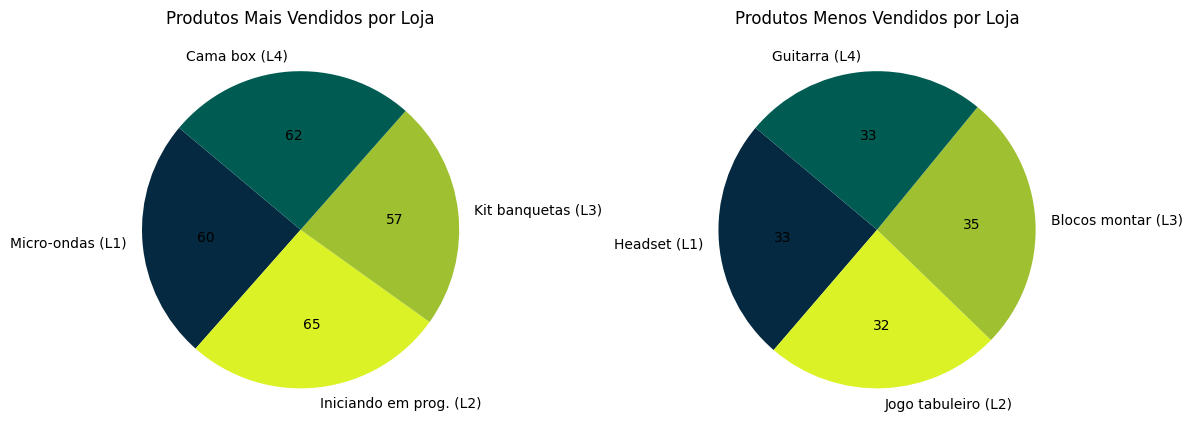

In [ ]:
import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Headset (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_padronizadas = ['#042940', '#DBF227', '#9FC131', '#005C53']

# Função para mostrar apenas os valores absolutos
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

plt.figure(figsize=(12, 6))

# Gráfico - Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Mais Vendidos por Loja')

# Gráfico - Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Menos Vendidos por Loja')

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [ ]:
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()


print("Frete Médio por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")

Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


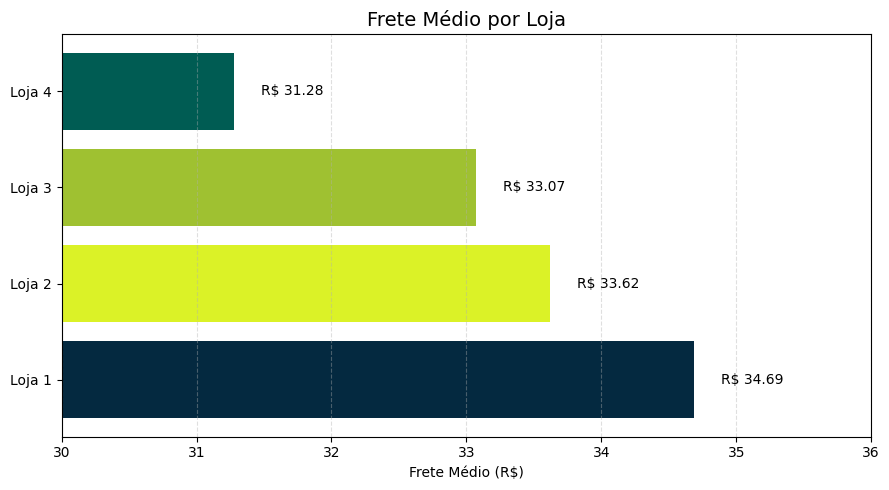

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes_medios = [34.69, 33.62, 33.07, 31.28]
cores = ['#042940', '#DBF227', '#9FC131', '#005C53'] # mesmas cores do gráfico de faturamento


plt.figure(figsize=(9,5))
plt.barh(lojas, fretes_medios, color=cores)


plt.title("Frete Médio por Loja", fontsize=14)
plt.xlabel("Frete Médio (R$)")
plt.xlim(30, 36)
plt.grid(axis='x', linestyle='--', alpha=0.4)


for i, valor in enumerate(fretes_medios):
    plt.text(valor + 0.2, i, f"R$ {valor:.2f}", va='center', fontsize=10)


plt.tight_layout()
plt.savefig("frete_medio_por_loja_horizontal.png", dpi=300, bbox_inches='tight')
plt.show()


# 📈📉 **Relatório**

## **Alura Store - Análise de Lojas Virtuais**
👗👖👕🧥🧦👗👖👕🧥🧦🩳🩲🩱👙👚👜🛍️🎸🖥️🖨️🖲️🎥📸☎️📲📞


---
Essa aplicação faz parte do Challenge Data Scince, turma 08, da alura com parceria com o grupo ONE, que visa observar os principais dados das 4 lojas do SR João.

Este projeto tem com o ***objetivo analisar o desempenho de 4 lojas e observar qual delas tem o menor desempenho***, e assim dar suporte a decisão estratégica de venda de uma delas, para que o dinheiro da venda possa ser realocar em outros investimentos. Esse relatório contará com a demostração dos seguintes indices de desempenho:



🔵 **Análise do Faturamente:**
Mostra os valores de faturamento anual de cada loja


🔵 **Vendas por categoria:**
Mostra o número de venda de cada produto das lojas


🔵 **Média de Avaliação das lojas:**
Mostra as médias de avaliação feitas pelos clientes


🔵 **Produtos Mais e Menos vendidos:**
Mostra os produtos que são mais vendido e menos vendido


🔵 **Frete médio por loja:**
Mostra os valores médios de frete de cada loja



## 📊 **Visualizações Criadas**


---
1. **Faturamento por Loja:**
Com base nos dados das vendas, foi gerado um gráfico de barras que apresenta o faturamento total de cada loja.

2. **Categorias de Produtos por Loja:**
Com base nos dados de produtos vendidos, foi gerado um gráfico de barras agrupadas que mostra a distribuição de categorias de produtos de cada lojas.

3. **Média de Avaliação da Compra:**
Com base nos dados de avaliação dos clientes, foi gerado um gráfico de dispersão que indica a nota média atribuída pelos clientes em cada loja.

4. **Produtos Mais e Menos Vendidos por Loja:**
Com base nos dados de vendas, foi gerado dois gráficos de pizza que revelam os produtos que foram mais e menos vendido de cada loja.

5. **Frete Médio por Loja:**
Com base nos dados do valor de frete, foi gerado um gráfico de barras horizontais que exibe o valor médio de frete cobrado por cada loja.


 ## 🏆 **Resultados Obtidos**


---

**Faturamento por Loja:** A Loja 1 apresentou um o maior faturamento, dentre todas. Já a loja 4 obteve o menor desempenho neste quisito.

**Categorias de Produtos por Loja:** Loja 1 e 2 tem como produtos com mais saida os da categoria acessórios e celulares, e a loja 4 teve um menor volume de vendas nessa categoria.

**Média de Avaliação da Compra:** A Loja 3 teve a melhor média de avaliação dos cliente, sendo assim a loja mais bem avaliada pelos clientes, dentre as outras.

**Produtos Mais e Menos Vendidos por Loja:** Neste quesito as lojas no geral se concentraram na vendas em um único produto.
Porém, a Loja 3 apresentou uma maior  dinâmica na  distribuição dos itens vendidos, promovendo uma não dependência de um único item para garantir o sua meta de vendas.

**Frete Médio por Loja:** Mesmo tendo os outros indicadores em declinio, a Loja 4 tem o menor custo médio de frete.


# **👨‍💻 Tecnologias Utilizadas**


---


1. Python — Para manipulação dos dados
2. Pandas — Para a análise dos dados
3. Matplotlib — Para a visualização dos dados
4. Google Colab — Para a operacionalização da aplicação




# **✅ Conclusão**


---

Devido seu menor faturamento e a pior performece em vendas por categoria, bem como sua  baixa avaliação de clientes dentre as 4 lojas.
# **A loja recomendada para venda é a Loja 4.**

Porém é importante salientar, que ***uma análise para a venda de um empreendimento é complexo e exigir uma análise completa da empresa, não só o faturamento e vendas, mas também informações contabil-financeira.*** O uso de indices financeiro como ROA e ROE são usados para essa analise, ***ROE (Retorno sobre o Património Líquido) e ROA (Retorno sobre Ativos) são dois indicadores financeiros usados para avaliar a rentabilidade de uma empresa.*** O ROE mostra o retorno gerado para os acionistas, enquanto o ROA mede a eficiência da empresa em gerar lucro a partir de todos os seus ativos, incluindo dívida. ***Assim, para uma análise mais completa, sugere-se que a empresa use as informações contabil-financeira do seu Balanço Patrimonial e Demostração de Resultado, para uma visão mais amplas em relação a que loja deve realmente ser vendida.***



# **🛠️ Como Executar**


---


1. Acesse o notebook no Google Colab ou Jupyter Notebook.

2. Para a visualização correta dos dados é necessário executar o notebook por seção.


# **👩‍🎓 Autora**


---

LinkedIn:

https://www.linkedin.com/in/andreza-lucas-da-silva-datascience/

Projeto baseado no Challenge de Data Science da Alura








